In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [63]:
train_df = pd.read_csv("predicao-variacao-time_window/data_after_process/train_0.csv")
del train_df['time_window']
train_df.head()

,time_start,volume,direction,tollgate_id
0,2016-09-19 00:00:00,13,0,1
1,2016-09-19 00:20:00,6,0,1
2,2016-09-19 00:40:00,9,0,1
3,2016-09-19 01:00:00,10,0,1
4,2016-09-19 01:20:00,14,0,1


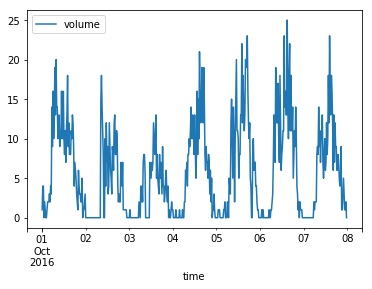

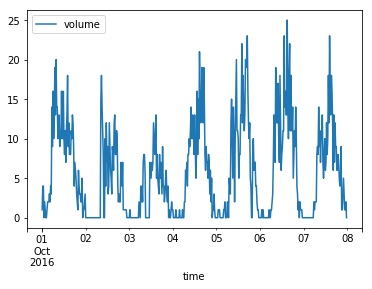

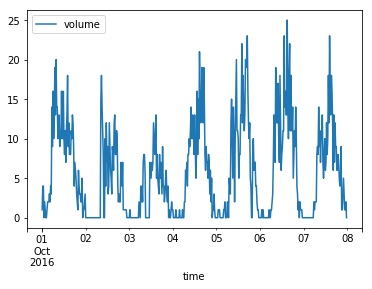

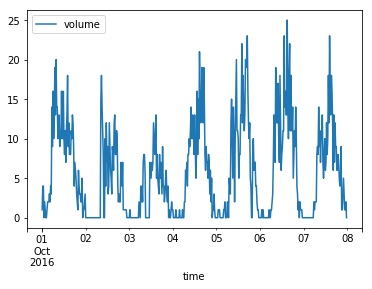

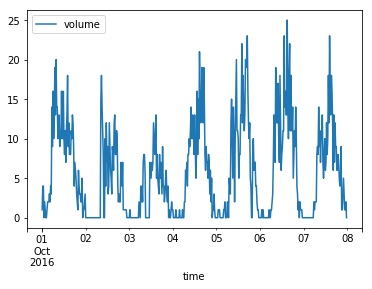

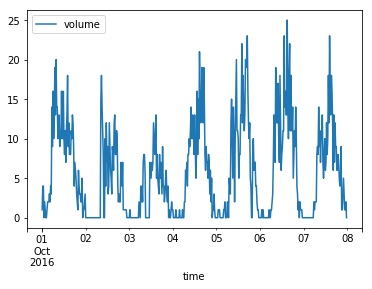

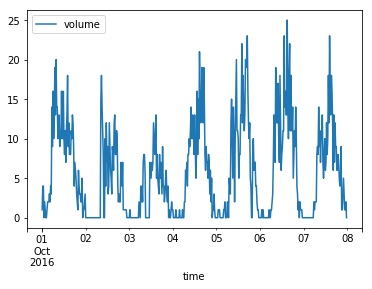

In [64]:
test1 = train_df.copy()
tollgate_id = 2
direction = 0
test1["time"] = test1["time_start"].apply(pd.Timestamp)
test1.index = test1["time"]
test1["day"] = test1["time"].apply(lambda x: x.day)
del test1['time_start']
del test1['time']
for offset in range(7):
    temp = test1[(test1["tollgate_id"] == tollgate_id) & 
                (test1["direction"] == direction) & 
                (test1["day"] >= 1) & 
                 (test1["day"] <= 7)][["volume"]]
    temp.plot()


TypeError: Empty 'DataFrame': no numeric data to plot

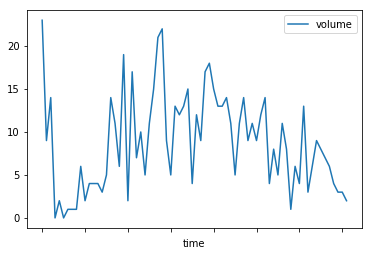

In [72]:
test2 = train_df.copy()
tollgate_id = 1
direction = 0
test2['time'] = test2['time_start']
test2.index = test2["time"]
test2['volume'] = test2['volume'].astype('float')
test2["date"] = test2["time"].apply(lambda x: pd.to_datetime(x[: 10]))
del test2['time_start']
del test2['time']
for tollgate_id in range(1,4):
    for direction in range(2):
        temp = test2[(test2["tollgate_id"] == tollgate_id) & 
                (test2["direction"] == direction) & 
                (test2["date"] >= '2016-10-01') & 
                 (test2["date"] <= '2016-10-01')][["volume"]]
        direction += 1
    temp.plot()
    direction = 0
    tollgate_id += 1

In [54]:
tollgate_id = [1,2,3]
tollgate_id

[1, 2, 3]

In [67]:
tollgate_id = 1
tollgate_id += 1
tollgate_id

2